<a href="https://colab.research.google.com/github/Wambui-123/1M-Pitch/blob/main/IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

IMDb (Internet Movie Database) is an online database of information related to films, television series, home videos, video games, and streaming content online. The Movie Name, Cast and Genres are nodes. The edges are Movie-Cast and Movie-Genres.

Research Question

How does the network of actors and genres in the top 10 revenue-generating movies influence the overall success and interconnectedness within the film industry?

https://github.com/Wambui-123/1M-Pitch


Importing Libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict

Creating dataframe

In [ ]:
a = pd.read_csv("/IMDb 2024 Movies TV Shows.csv")
df = pd.DataFrame(a)
df

,Budget,Home_Page,Movie_Name,Genres,Overview,Cast,Original_Language,Storyline,Production_Company,Release_Date,Revenue,Run_Time,Tagline,Vote_Average,Vote_Count
0,"$50,000,000",https://www.imdb.com/title/tt5040012/,Nosferatu,"['Fantasy', 'Horror', 'Mystery']",A gothic tale of obsession between a haunted y...,"['Lily-Rose Depp', 'Nicholas Hoult', 'Bill Ska...","['English', 'German', 'Romanian', 'Russian']",A gothic tale of obsession between a haunted y...,"['Focus Features', 'Maiden Voyage Pictures', '...","['December 25, 2024 (United States)']","$176,020,460",['2 hours 12 minutes'],Succumb to the darkness.,7.3,151K
1,"€25,000,000",https://www.imdb.com/title/tt20221436/,Emilia Pérez,"['Comedy', 'Crime', 'Drama', 'Musical', 'Thril...",Emilia Pérez follows three remarkable women in...,"['Zoe Saldaña', 'Karla Sofía Gascón', 'Selena ...","['Spanish', 'English']","In modern-day Mexico, overqualified and exploi...","['Why Not Productions', 'Page 114', 'Pathé']","['November 13, 2024 (United States)']","$14,972,413",['2 hours 12 minutes'],Not_Found,5.5,71K
2,"$10,000,000",https://www.imdb.com/title/tt8999762/,The Brutalist,['Drama'],When a visionary architect and his wife flee p...,"['Adrien Brody', 'Felicity Jones', 'Guy Pearce...","['English', 'Hungarian', 'Italian', 'Hebrew', ...",When visionary architect László Toth and his w...,"['Brookstreet Pictures', 'Kaplan Morrison', 'I...","['January 24, 2025 (Canada)']","$31,133,665",['3 hours 34 minutes'],Welcome to America.,7.9,28K
3,"$25,000,000",https://www.imdb.com/title/tt27657135/,Saturday Night,"['Biography', 'Comedy', 'Drama', 'History']","At 11:30pm on October 11th, 1975, a ferocious ...","['Gabriel LaBelle', 'Rachel Sennott', 'Cory Mi...",['English'],"At 11:30pm on October 11, 1975, a ferocious tr...","['Columbia Pictures', 'TSG Entertainment']","['October 11, 2024 (United States)']","$10,029,741",['1 hour 49 minutes'],"October 11, 1975, The First Saturday Night Liv...",7.0,26K
4,"$17,500,000",https://www.imdb.com/title/tt17526714/,The Substance,"['Drama', 'Horror', 'Sci-Fi']",A fading celebrity takes a black-market drug: ...,"['Demi Moore', 'Margaret Qualley', 'Dennis Qua...",['English'],Have you ever dreamed of a better version of y...,"['Working Title Films', 'A Good Story', 'Black...","['September 20, 2024 (United States)']","$76,999,041",['2 hours 21 minutes'],"If you follow the instructions, what could go ...",7.3,249K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,000,https://www.imdb.com/title/tt28288478/,The Cage,"['Biography', 'Drama', 'Sport']","Dreaming of going pro, a young fighter struggl...","['Franck Gastambide', 'Melvin Boomer', 'Bosh',...",['French'],"Dreaming of going pro, a young fighter struggl...",['Ondamax Films'],"['November 8, 2024 (United States)']",000,['45 minutes'],Fight for your dreams.,6.5,2.3K
497,HRK,https://www.imdb.com/title/tt20519854/,The Man Who Could Not Remain Silent,"['Short', 'Drama']","1993, Bosnia and Herzegovina. A passenger trai...","['Dragan Micanovic', 'Goran Bogdan', 'Alexis M...",['Croatian'],"1993, Bosnia and Herzegovina. A passenger trai...","['Antitalent Produkcija', 'Contrast Films', 'L...","['January 16, 2025 (Croatia)']",000,['13 minutes'],Not_Found,7.4,1.3K
498,000,https://www.imdb.com/title/tt28349451/,The Shadow Strays,"['Action', 'Crime', 'Thriller']","Codename 13, a 17-year-old assassin, is suspen...","['Aurora Ribero', 'Hana Malasan', 'Taskya Namy...","['Indonesian', 'English', 'Japanese', 'Chinese']","Codename 13, a 17-year-old trained assassin is...","['Frontier Pictures', 'XYZ Films']","['October 17, 2024 (United States)']",000,['2 hours 24 minutes'],Not_Found,6.5,8.6K
499,000,https://www.imdb.com/title/tt31609000/,Anthracite,"['Crime', 'Drama', 'Mystery', 'Thriller']",An old case is wrenched open when a reporter g...,"['Hatik', 'Noémie Schmidt', 'Camille Lou', 'Ni...",['French'],"In 1994, the collective suicide of a sect base...",['Mediawan'],"['April 10, 2024 (United States)']",000,['50 minutes'

Real Network Creation

Nodes: [('Landman', {'type': 'movie', 'budget': '000', 'revenue': 0.0}), ("['Drama']", {'type': 'genre'}), ("['Billy Bob Thornton', 'Ali Larter', 'Jacob Lofland', 'Michelle Randolph', 'Paulina Chávez', 'Kayla Wallace', 'Mark Collie', 'James Jordan', 'Demi Moore', 'Jon Hamm', 'Colm Feore', 'Mustafa Speaks', 'Mitchell Slaggert', 'Alex Meraz', 'J.R. Villarreal', 'Octavio Rodriguez', 'Ben Browder', 'Robyn Lively']", {'type': 'actor'}), ('High Potential', {'type': 'movie', 'budget': '000', 'revenue': 0.0}), ("['Crime', 'Drama', 'Mystery']", {'type': 'genre'}), ("['Kaitlin Olson', 'Daniel Sunjata', 'Javicia Leslie', 'Deniz Akdeniz', 'Amirah J', 'Matthew Lamb', 'Judy Reyes', 'Taran Killam', 'JD Pardo', 'Garret Dillahunt', 'TJ Lee', 'Hudson Macready', 'Anthony Darrell', 'Domenick Lombardozzi', 'Jocko Sims', 'Ariella Amar', 'Derek Richardson', 'Nasim Pedrad']", {'type': 'actor'}), ('Dexter: Original Sin', {'type': 'movie', 'budget': '000', 'revenue': 0.0}), ("['Patrick Gibson', 'Christian Slate

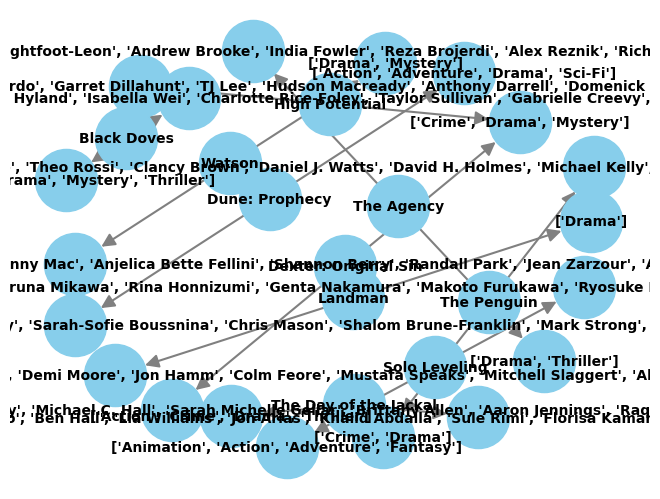

Number of edges: 20
Number of nodes: 29


In [ ]:
# Convert 'Revenue' column to numeric, coercing errors to NaN
a['Revenue'] = pd.to_numeric(a['Revenue'], errors='coerce')

# Filter the top 10 movies based on 'Revenue'
top_movies = a.nlargest(10, 'Revenue')

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges for movies, genres, and cast (only for top 10 movies)
for index, row in top_movies.iterrows():
    movie_name = row['Movie_Name']
    genres = row['Genres'].split(';') if isinstance(row['Genres'], str) else []  # Handle non-string values
    cast = row['Cast'].split(';') if isinstance(row['Cast'], str) else []  # Handle non-string values
    # Add movie node
    G.add_node(movie_name, type='movie', budget=row['Budget'], revenue=row['Revenue'])

    # Add genre nodes and edges
    for genre in genres:
        G.add_node(genre, type='genre')
        G.add_edge(movie_name, genre)

    # Add cast nodes and edges
    for actor in cast:
        G.add_node(actor, type='actor')
        G.add_edge(movie_name, actor)

# Display the nodes and edges
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # or try nx.circular_layout() for a different layout

# Draw the graph with arrows for directed edges
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray", width=1.5, arrowsize=20)

plt.show()

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of edges: {num_edges}")
print(f"Number of nodes: {num_nodes}")


Nodes degree and Average Degree

In [ ]:
if len(G) > 0:
    #  the degrees of each nodes
  degrees = dict(G.degree())

#  the degrees of each nodes
  degrees = dict(G.degree())

  #  the average degree
  average_degree = sum(degrees.values()) / len(G)
  print(degrees)
  print(len(G))
  print(f"Average Degree: {average_degree}")

else:
    print("The graph is empty. No nodes found.")


if len(G) > 0:
    pos = nx.spring_layout(G, seed=42)


{'Landman': 2, "['Drama']": 1, "['Billy Bob Thornton', 'Ali Larter', 'Jacob Lofland', 'Michelle Randolph', 'Paulina Chávez', 'Kayla Wallace', 'Mark Collie', 'James Jordan', 'Demi Moore', 'Jon Hamm', 'Colm Feore', 'Mustafa Speaks', 'Mitchell Slaggert', 'Alex Meraz', 'J.R. Villarreal', 'Octavio Rodriguez', 'Ben Browder', 'Robyn Lively']": 1, 'High Potential': 2, "['Crime', 'Drama', 'Mystery']": 2, "['Kaitlin Olson', 'Daniel Sunjata', 'Javicia Leslie', 'Deniz Akdeniz', 'Amirah J', 'Matthew Lamb', 'Judy Reyes', 'Taran Killam', 'JD Pardo', 'Garret Dillahunt', 'TJ Lee', 'Hudson Macready', 'Anthony Darrell', 'Domenick Lombardozzi', 'Jocko Sims', 'Ariella Amar', 'Derek Richardson', 'Nasim Pedrad']": 1, 'Dexter: Original Sin': 2, "['Patrick Gibson', 'Christian Slater', 'Molly Brown', 'Christina Milian', 'James Martinez', 'Alex Shimizu', 'Reno Wilson', 'Patrick Dempsey', 'Michael C. Hall', 'Sarah Michelle Gellar', 'Brittany Allen', 'Aaron Jennings', 'Raquel Justice', 'Sarah Kinsey', 'Eli Sherman

Degree Distribution

[2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1]
Degree Distribution:
Degree 1: 18 nodes
Degree 2: 11 nodes


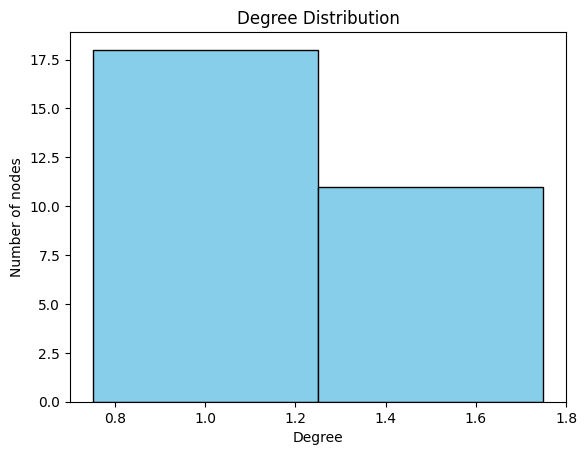

In [ ]:
degree_values = list(degrees.values())
print(degree_values)
# degree distribution
degree_distribution = {degree: degree_values.count(degree) for degree in set(degree_values)}

# Print degree distribution
print("Degree Distribution:")
for degree, count in degree_distribution.items():
    print(f"Degree {degree}: {count} nodes")

# Visualize the degree distribution
plt.hist(degrees.values(), bins=len(degree_distribution),color='skyblue', edgecolor='black',align='left', rwidth=1)

plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution")
plt.show()




Clustering

In [ ]:
local_clustering_coefficients = nx.clustering(G)


global_clustering_coefficient = nx.average_clustering(G)

print("Local Clustering Coefficients:")
for node, cc in local_clustering_coefficients.items():
    print(f"Node {node}: {cc}")

print(f"\nGlobal Clustering Coefficient: {global_clustering_coefficient}")

Local Clustering Coefficients:
Node Landman: 0
Node ['Drama']: 0
Node ['Billy Bob Thornton', 'Ali Larter', 'Jacob Lofland', 'Michelle Randolph', 'Paulina Chávez', 'Kayla Wallace', 'Mark Collie', 'James Jordan', 'Demi Moore', 'Jon Hamm', 'Colm Feore', 'Mustafa Speaks', 'Mitchell Slaggert', 'Alex Meraz', 'J.R. Villarreal', 'Octavio Rodriguez', 'Ben Browder', 'Robyn Lively']: 0
Node High Potential: 0
Node ['Crime', 'Drama', 'Mystery']: 0
Node ['Kaitlin Olson', 'Daniel Sunjata', 'Javicia Leslie', 'Deniz Akdeniz', 'Amirah J', 'Matthew Lamb', 'Judy Reyes', 'Taran Killam', 'JD Pardo', 'Garret Dillahunt', 'TJ Lee', 'Hudson Macready', 'Anthony Darrell', 'Domenick Lombardozzi', 'Jocko Sims', 'Ariella Amar', 'Derek Richardson', 'Nasim Pedrad']: 0
Node Dexter: Original Sin: 0
Node ['Patrick Gibson', 'Christian Slater', 'Molly Brown', 'Christina Milian', 'James Martinez', 'Alex Shimizu', 'Reno Wilson', 'Patrick Dempsey', 'Michael C. Hall', 'Sarah Michelle Gellar', 'Brittany Allen', 'Aaron Jennings'

Density

In [ ]:

graph_density = nx.density(G)


print(f"Graph Density: {graph_density}")

Graph Density: 0.024630541871921183


# Shortest Path/Erdos-Reiny Graph

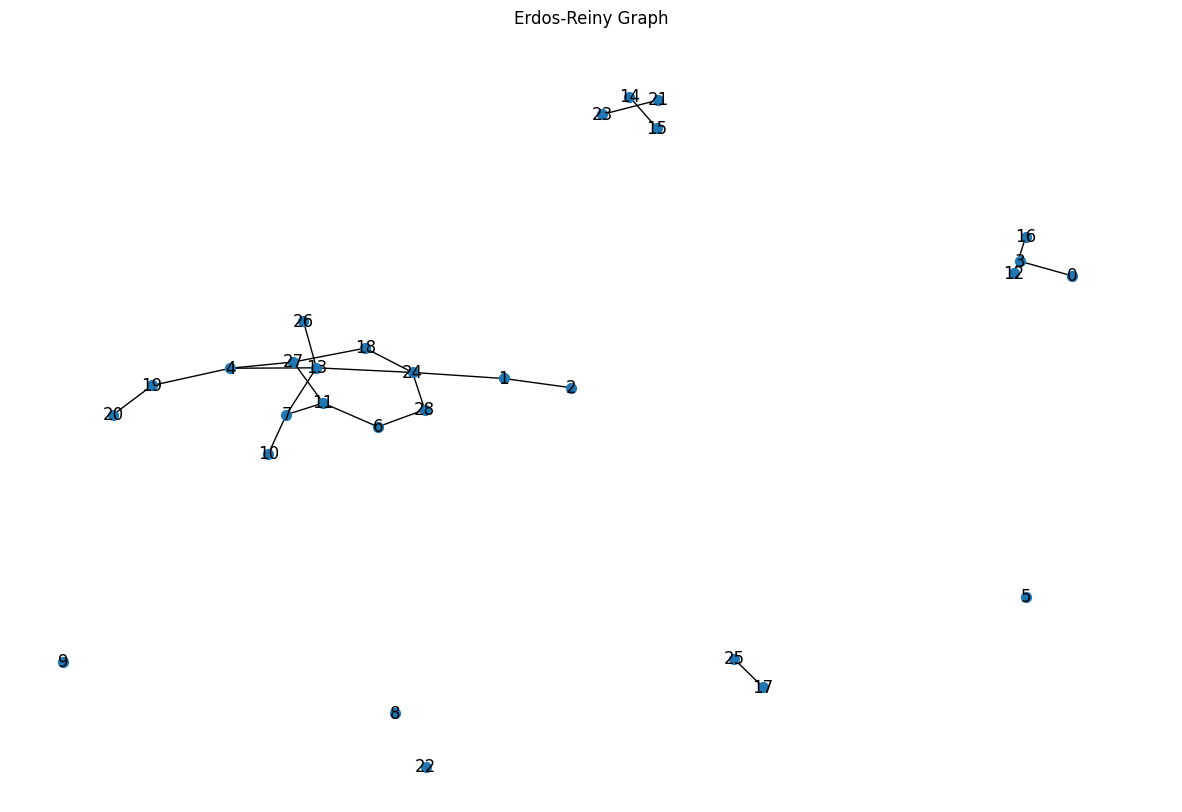

In [ ]:
erdos_renyi_graph = nx.erdos_renyi_graph (n=num_nodes, p=average_degree/num_nodes)



plt.figure(figsize=(15, 10))
plt. title("Erdos-Reiny Graph")
nx.draw(erdos_renyi_graph, with_labels=True,node_size=50)

plt.show()

# Watts Strogatz Graph

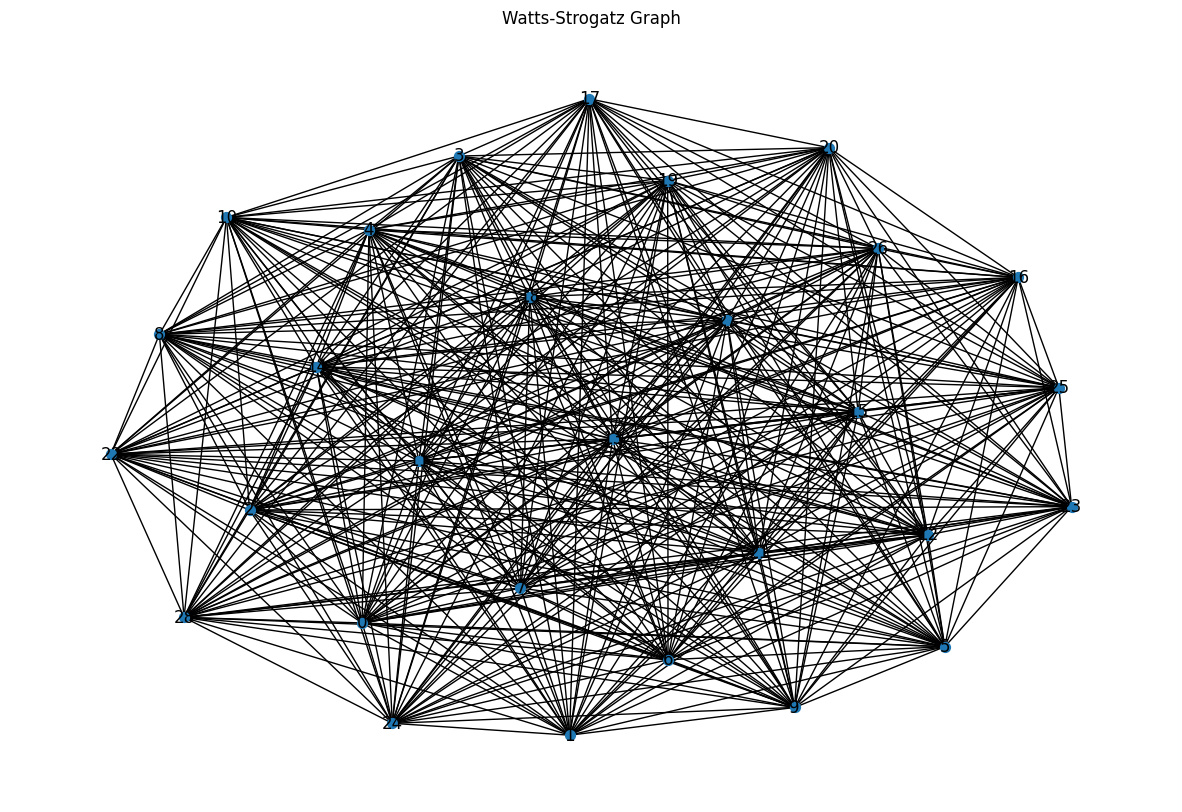

In [ ]:
watts_strogatz_graph = nx.watts_strogatz_graph(n=num_nodes, k=min(33, num_nodes -1 ), p=0.2) #k must be less than number of nodes



plt.figure(figsize=(15, 10))
plt. title("Watts-Strogatz Graph")

nx. draw(watts_strogatz_graph, with_labels=True, node_size=50)

plt.show()


# Barabasi Albert Graph


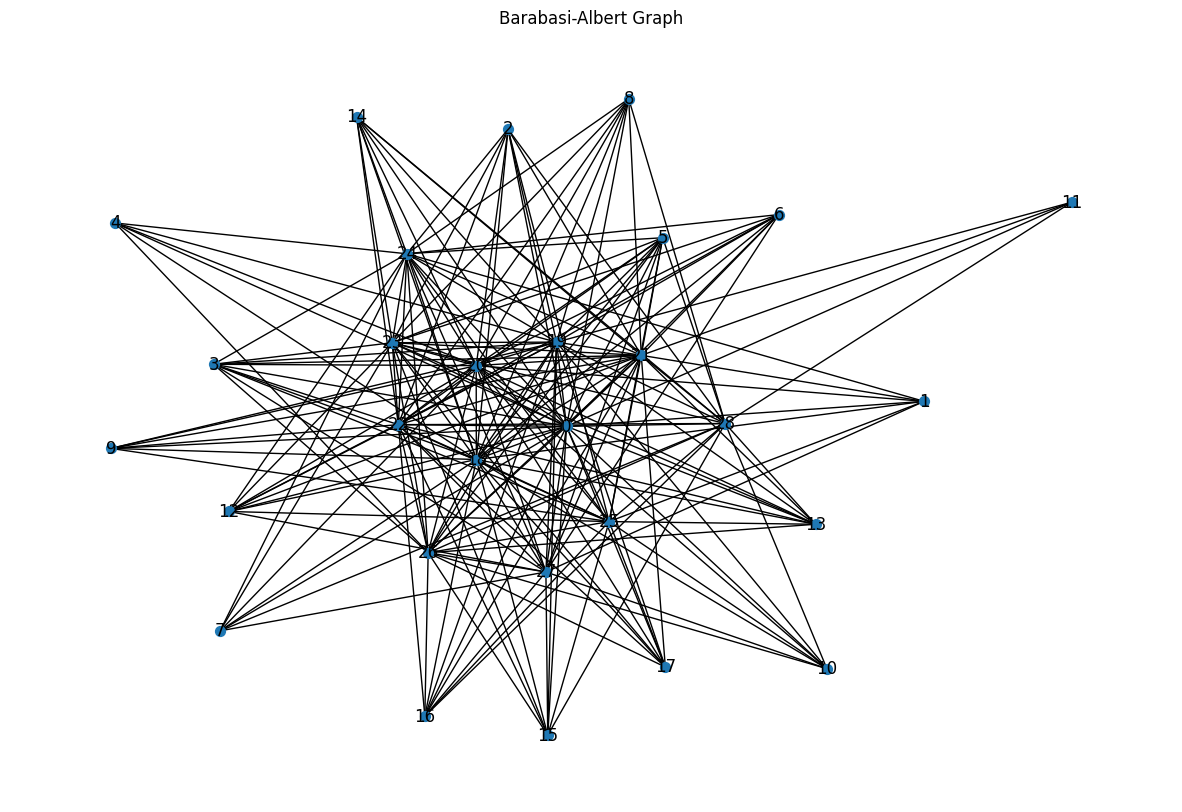

In [ ]:
barabasi_albert_graph = nx. barabasi_albert_graph (n=num_nodes, m= 17)
plt.figure(figsize=(15, 10))
plt. title("Barabasi-Albert Graph")
nx.draw(barabasi_albert_graph, with_labels=True,node_size=50)
plt.show()


# Graph Analysis

In [3]:
def calculate_and_plot(graph, title):
    avg_degree = np.mean(list(dict(graph.degree()).values()))
    print(f"{title} Average Degree: {avg_degree}")
    num_edges = graph.number_of_edges()
    print(f"{title} num_edges: {num_edges}")
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.hist(degree_sequence, bins=int(np.sqrt(len(degree_sequence))),edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}  Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("frequence")

    clustering_coefficient = nx.average_clustering(graph)
    print(f"{title}  Clustering Coefficient: {clustering_coefficient}")

    plt.subplot(122)
    nx.draw(graph, with_labels=True)
    plt.title(f"{title}  Graph Visualization")

    local_clustering_coefficients = nx.clustering(graph)
    plt.figure(figsize=(12, 4))
    plt.scatter(local_clustering_coefficients.keys(),local_clustering_coefficients.values())
    plt.title(f"{title} scatter plot of clustering_coefficients")
    plt.xlabel("node")
    plt.ylabel("clustering_coefficients")

    plt.tight_layout()
    plt.show()

Movie Network Graph Average Degree: 1.3793103448275863
Movie Network Graph num_edges: 20
Movie Network Graph  Clustering Coefficient: 0.0


<ipython-input-35-d9879480adb9>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


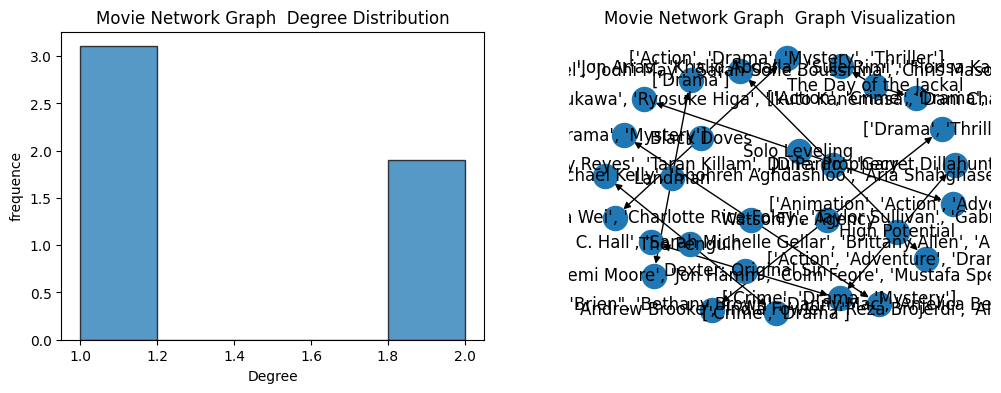

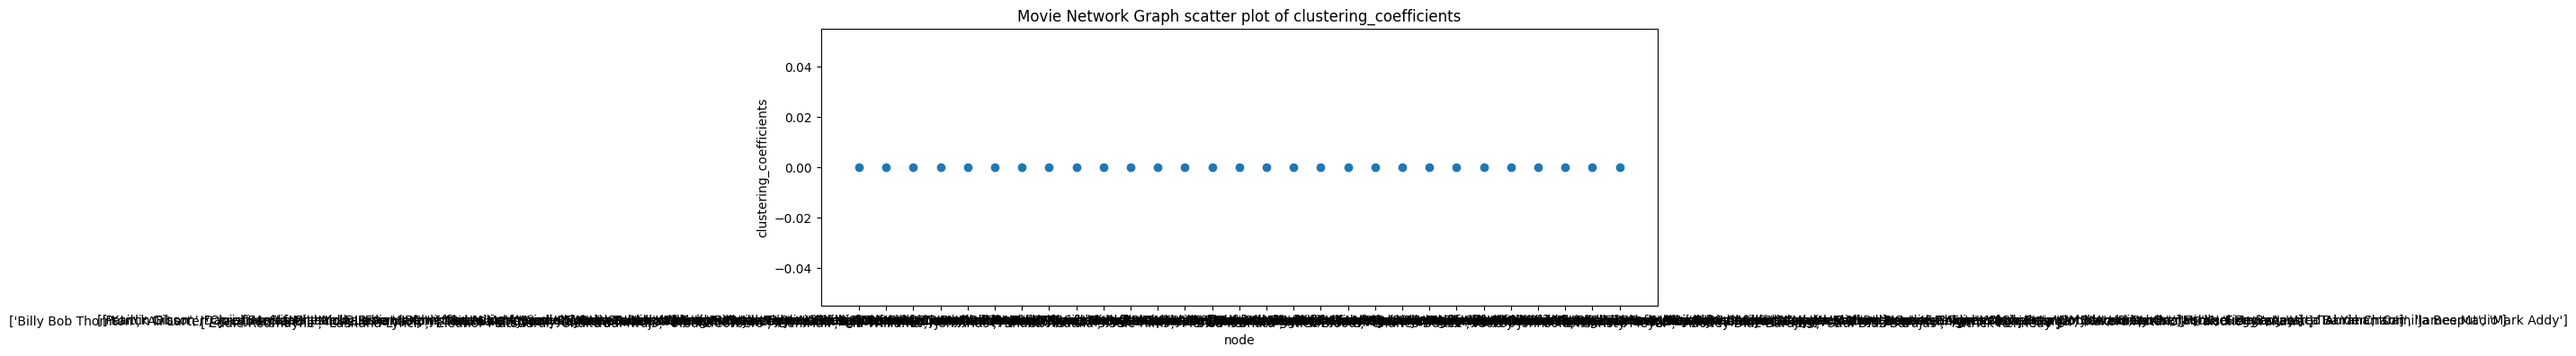

Erdos-Reiny Graph Average Degree: 1.5172413793103448
Erdos-Reiny Graph num_edges: 22
Erdos-Reiny Graph  Clustering Coefficient: 0.0


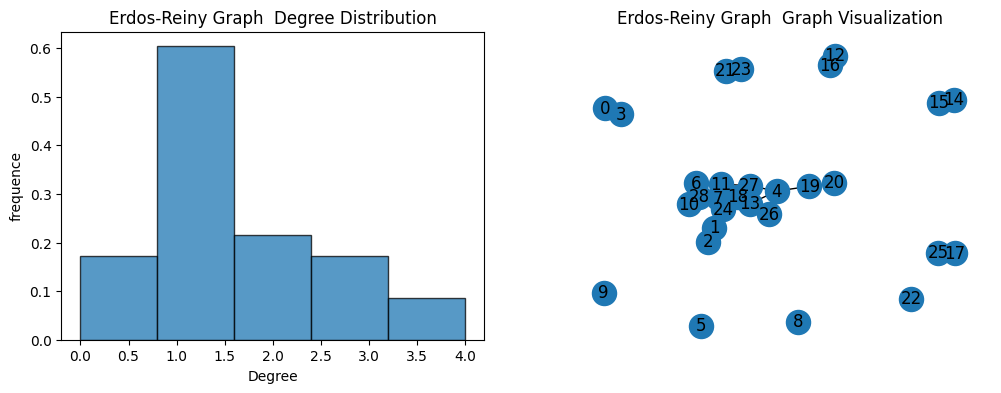

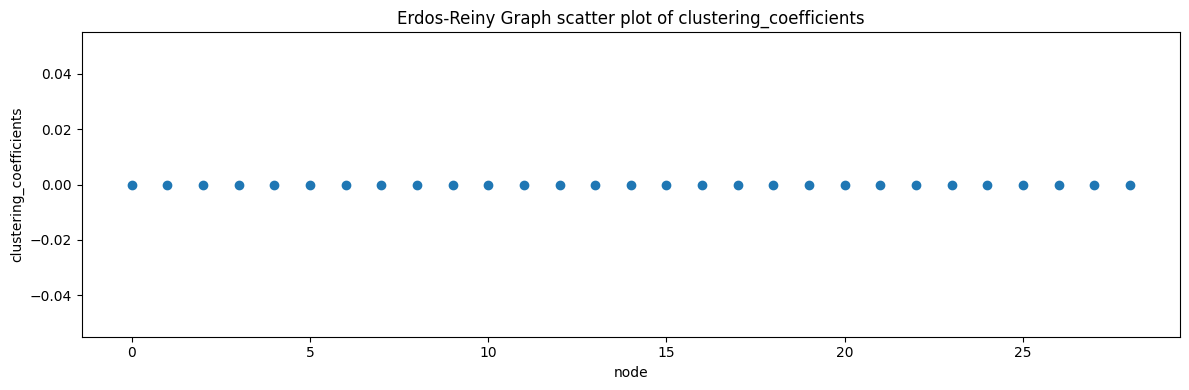

Watts-Strogatz Graph Average Degree: 28.0
Watts-Strogatz Graph num_edges: 406
Watts-Strogatz Graph  Clustering Coefficient: 1.0


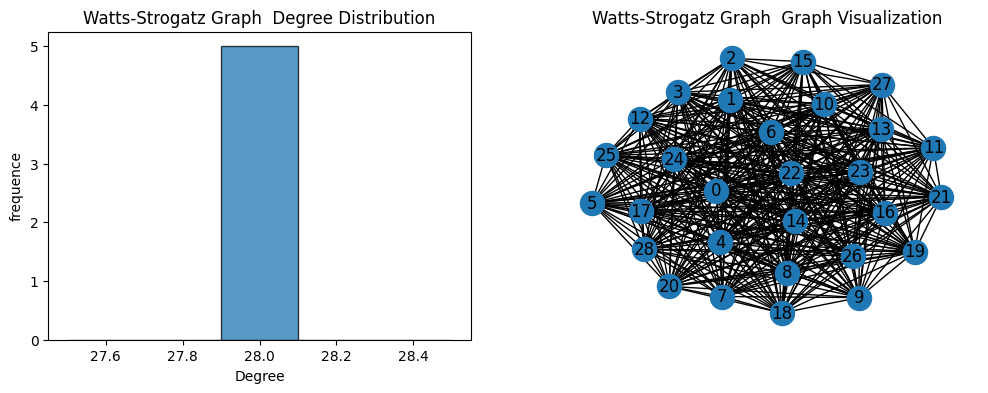

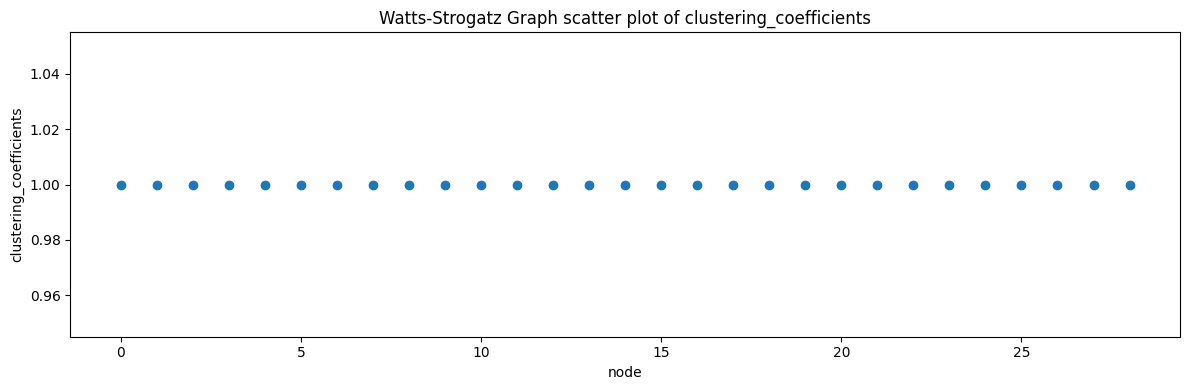

Barabasi-Albert Graph Average Degree: 14.068965517241379
Barabasi-Albert Graph num_edges: 204
Barabasi-Albert Graph  Clustering Coefficient: 0.762336496966419


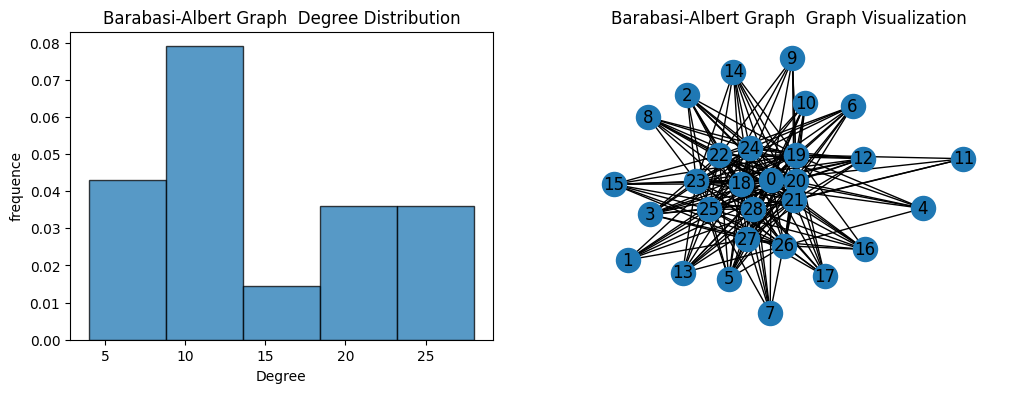

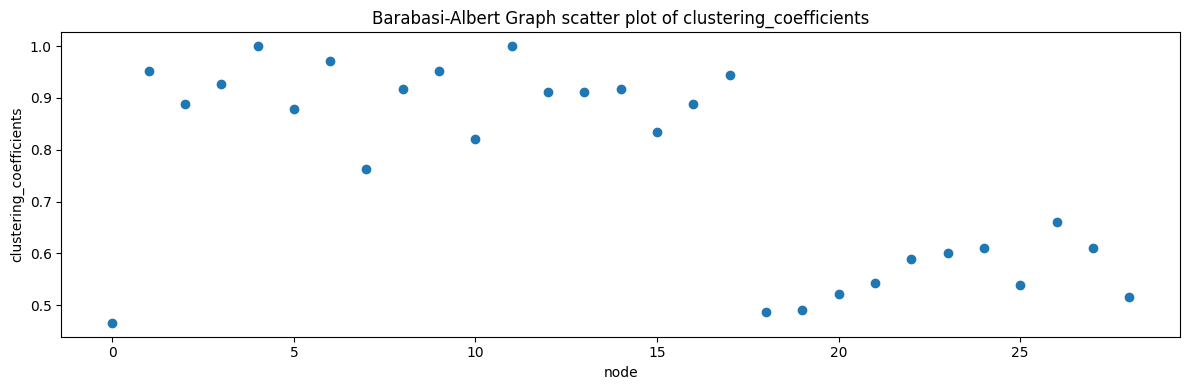

In [ ]:
# originalgraph
calculate_and_plot(G, "Movie Network Graph")
# Erdos-Reiny Graph
calculate_and_plot(erdos_renyi_graph, "Erdos-Reiny Graph")

# Watts-Strogatz Graph
calculate_and_plot(watts_strogatz_graph, "Watts-Strogatz Graph")

# Barabasi-Albert Graph
calculate_and_plot(barabasi_albert_graph, "Barabasi-Albert Graph")


In [ ]:
def analisys(graph, title):
    # degree centrality
    degree_centrality = nx.degree_centrality(graph)
    s_d=sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    print(f"degree centrality of {title} = {s_d[:5]}\n")
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.hist(degree_centrality.values(), bins=int(np.sqrt( len(degree_centrality))),edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}  Degree centrality")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")

    #eigenvector centrality
    try:
        eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000, tol=1e-06, weight="weight")
        s_e=sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
        print(f"eigenvector centrality of {title} = {s_e[:5]}\n")

        plt.subplot(122)
        plt.hist(eigenvector_centrality.values(), bins=int(np.sqrt(len(eigenvector_centrality))), edgecolor='black', density=True, alpha=0.75)
        plt.title(f"{title}  eigenvector centrality ")
        plt.xlabel("Degree")
        plt.ylabel("Number of nodes")
    except nx.PowerIterationFailedConvergence:
        print(f"Eigenvector centrality calculation for '{title}' failed to converge. Skipping...")

    # pagerank
    pagerank = nx.pagerank(graph, weight="weight")
    s_p = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
    print(f" pagerank of {title} = {s_p[:5]}\n")
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.hist(pagerank.values(), bins=int(np.sqrt(len(pagerank))), edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}   pagerank")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")

    # closeness_centrality
    closeness_centrality = nx.closeness_centrality(graph)
    s_c = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
    print(f" closeness_centrality {title} = {s_c[:5]}\n")

    plt.subplot(122)
    plt.hist(closeness_centrality.values(), bins=int(np.sqrt(len(closeness_centrality))), edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}   closeness_centrality")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")

    # betweenness_centrality
    betweenness_centrality = nx.betweenness_centrality(graph, weight="weight")
    s_b = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    print(f"betweenness centrality of {title} = {s_b[:5]}\n")
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.hist(betweenness_centrality.values(), bins=int(np.sqrt(len(betweenness_centrality))), edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}  betweenness_centrality")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")

    plt.tight_layout()
    plt.show()

degree centrality of Movie Network Graph = [('Landman', 0.07142857142857142), ('High Potential', 0.07142857142857142), ("['Crime', 'Drama', 'Mystery']", 0.07142857142857142), ('Dexter: Original Sin', 0.07142857142857142), ('The Day of the Jackal', 0.07142857142857142)]

eigenvector centrality of Movie Network Graph = [("['Crime', 'Drama', 'Mystery']", 0.42582441937212984), ("['Drama']", 0.21326413069381056), ("['Billy Bob Thornton', 'Ali Larter', 'Jacob Lofland', 'Michelle Randolph', 'Paulina Chávez', 'Kayla Wallace', 'Mark Collie', 'James Jordan', 'Demi Moore', 'Jon Hamm', 'Colm Feore', 'Mustafa Speaks', 'Mitchell Slaggert', 'Alex Meraz', 'J.R. Villarreal', 'Octavio Rodriguez', 'Ben Browder', 'Robyn Lively']", 0.21326413069381056), ("['Kaitlin Olson', 'Daniel Sunjata', 'Javicia Leslie', 'Deniz Akdeniz', 'Amirah J', 'Matthew Lamb', 'Judy Reyes', 'Taran Killam', 'JD Pardo', 'Garret Dillahunt', 'TJ Lee', 'Hudson Macready', 'Anthony Darrell', 'Domenick Lombardozzi', 'Jocko Sims', 'Ariella

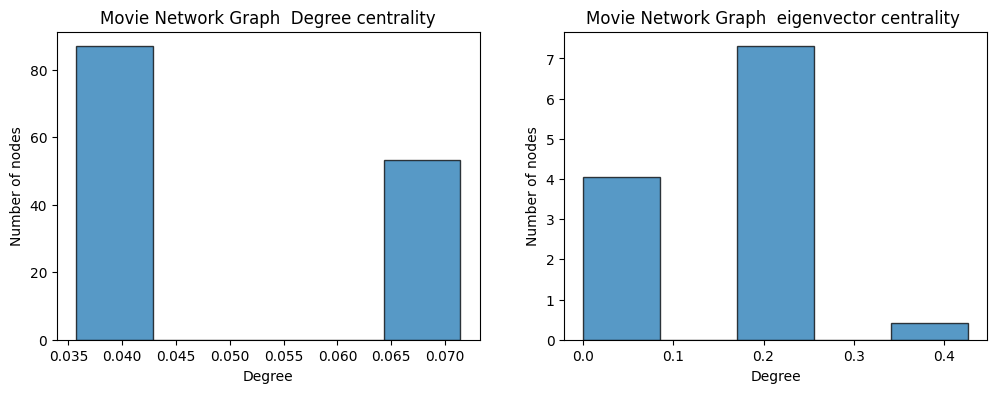

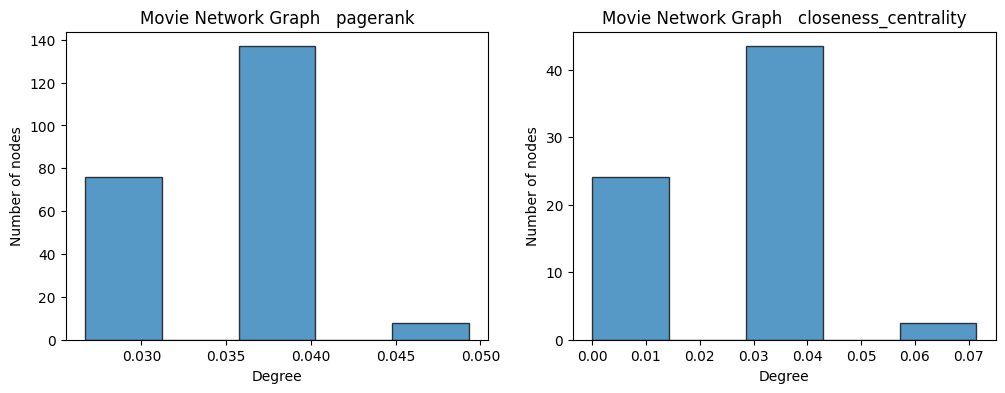

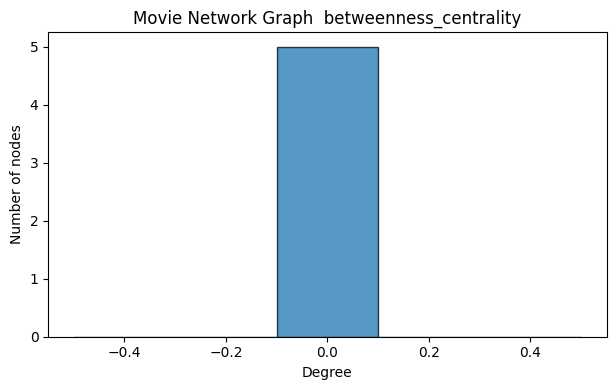

In [ ]:
# originalgraph
analisys(G, "Movie Network Graph")

degree centrality of Erdos-Reiny Graph = [(13, 0.14285714285714285), (24, 0.14285714285714285), (4, 0.10714285714285714), (7, 0.10714285714285714), (11, 0.10714285714285714)]

eigenvector centrality of Erdos-Reiny Graph = [(13, 0.4384054832234433), (24, 0.3959031811681269), (4, 0.33119780870722965), (27, 0.32848139092913614), (7, 0.3126947959332503)]

 pagerank of Erdos-Reiny Graph = [(13, 0.06437664031212219), (24, 0.06425314533590626), (7, 0.050180849599493454), (4, 0.04954855024239694), (11, 0.04791377227553407)]

 closeness_centrality Erdos-Reiny Graph = [(13, 0.25925925925925924), (24, 0.2413793103448276), (4, 0.22580645161290322), (27, 0.21875), (7, 0.21212121212121213)]

betweenness centrality of Erdos-Reiny Graph = [(13, 0.14285714285714285), (24, 0.14285714285714285), (4, 0.10714285714285714), (7, 0.10714285714285714), (11, 0.10714285714285714)]



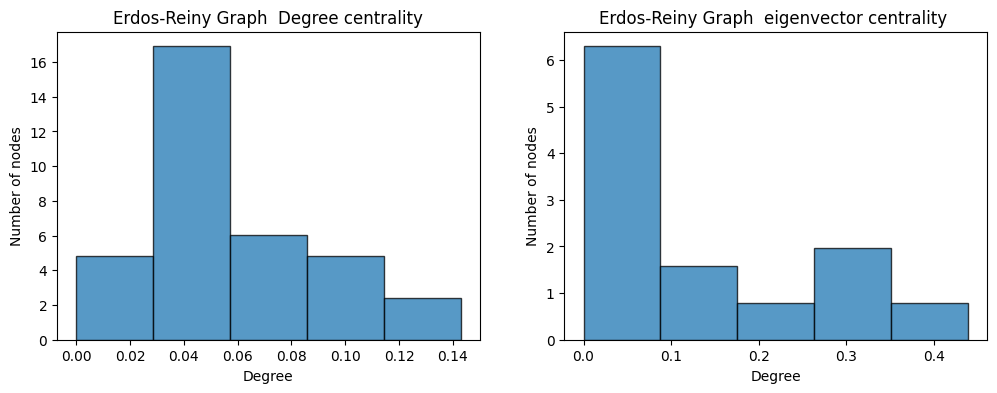

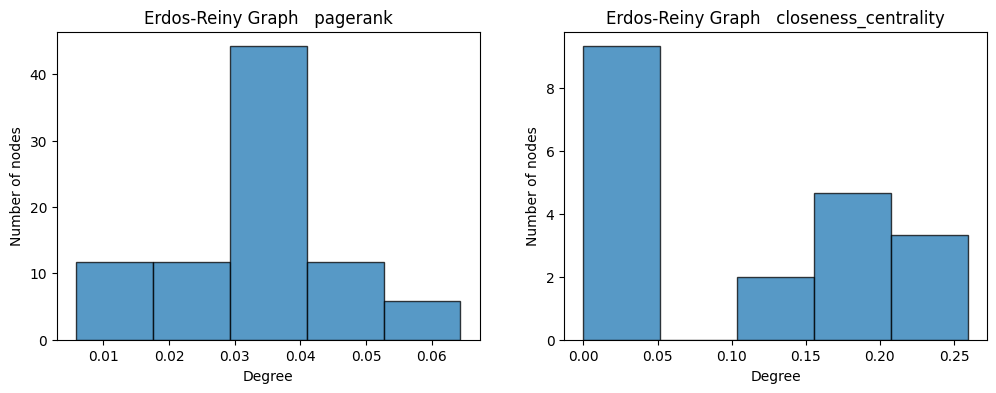

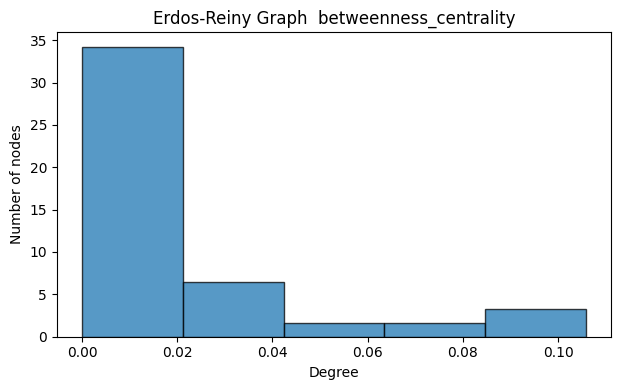

degree centrality of Watts-Strogatz Graph = [(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0)]

eigenvector centrality of Watts-Strogatz Graph = [(0, 0.18569533817705186), (1, 0.18569533817705186), (2, 0.18569533817705186), (3, 0.18569533817705186), (4, 0.18569533817705186)]

 pagerank of Watts-Strogatz Graph = [(0, 0.03448275862068964), (1, 0.03448275862068964), (2, 0.03448275862068964), (3, 0.03448275862068964), (4, 0.03448275862068964)]

 closeness_centrality Watts-Strogatz Graph = [(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0)]

betweenness centrality of Watts-Strogatz Graph = [(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0)]



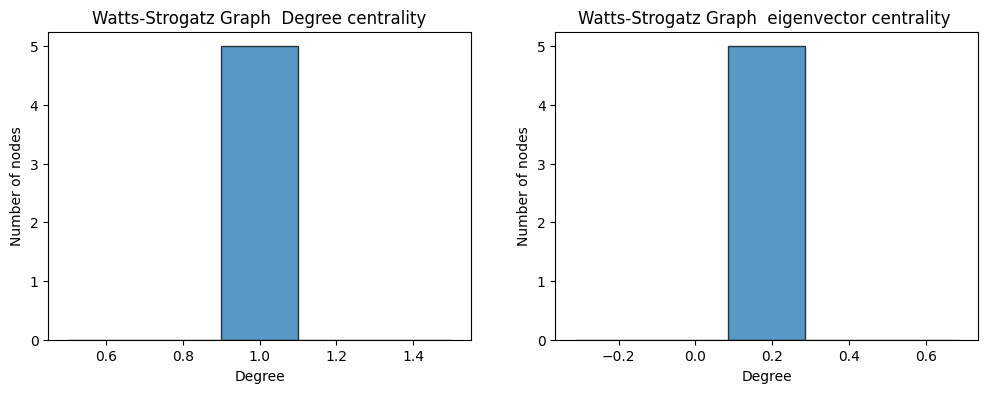

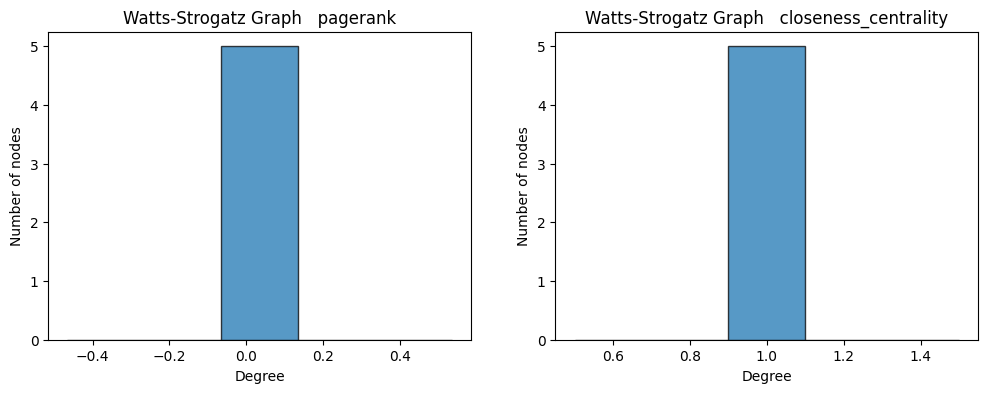

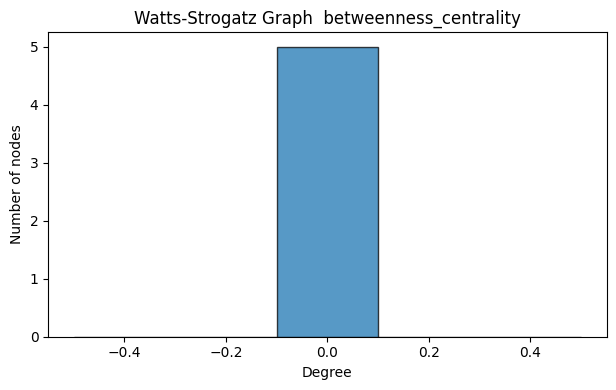

degree centrality of Barabasi-Albert Graph = [(0, 1.0), (18, 0.9285714285714285), (19, 0.8928571428571428), (20, 0.8571428571428571), (21, 0.8571428571428571)]

eigenvector centrality of Barabasi-Albert Graph = [(0, 0.2884469881587501), (18, 0.27461668126136723), (19, 0.2647775803039405), (21, 0.2635323098167458), (22, 0.2615143361565917)]

 pagerank of Barabasi-Albert Graph = [(0, 0.06561963784782217), (18, 0.0607223156616574), (19, 0.05890095008500363), (21, 0.05637228267556977), (20, 0.05631110864035581)]

 closeness_centrality Barabasi-Albert Graph = [(0, 1.0), (18, 0.9333333333333333), (19, 0.9032258064516129), (20, 0.875), (21, 0.875)]

betweenness centrality of Barabasi-Albert Graph = [(0, 1.0), (18, 0.9285714285714285), (19, 0.8928571428571428), (20, 0.8571428571428571), (21, 0.8571428571428571)]



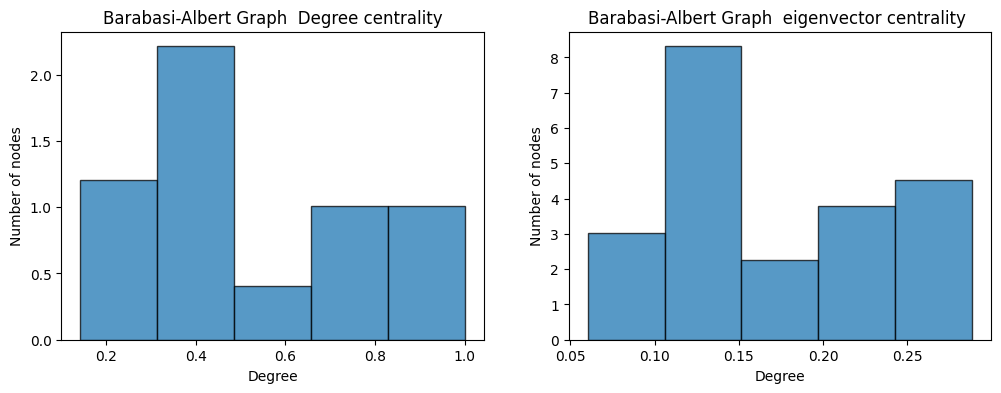

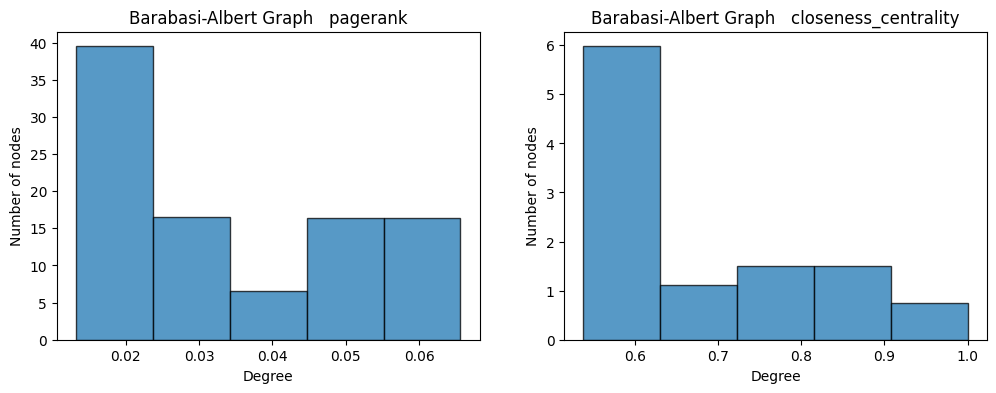

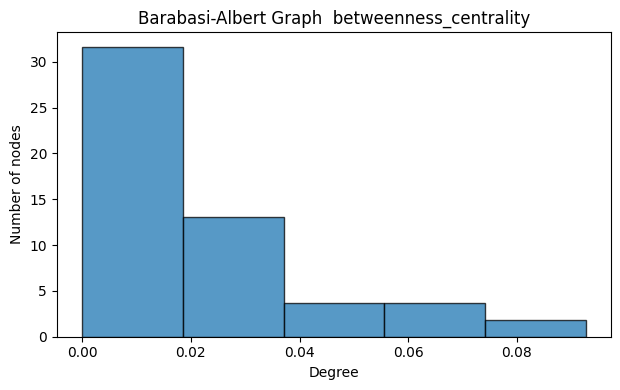

In [ ]:
# Erdos-Reiny Graph
analisys(erdos_renyi_graph, "Erdos-Reiny Graph")

# Watts-Strogatz Graph
analisys(watts_strogatz_graph, "Watts-Strogatz Graph")

# Barabasi-Albert Graph
analisys(barabasi_albert_graph, "Barabasi-Albert Graph")